In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
Data_iris = iris.data

In [6]:
Data_iris.shape

(150, 4)

### k-Means Clustering Algorithm

In [7]:
from sklearn.cluster import KMeans

In [8]:
KMNS = KMeans(n_clusters=3)
KMNS

KMeans(n_clusters=3)

In [9]:
KMNS.fit(Data_iris)

KMeans(n_clusters=3)

In [10]:
Labels = KMNS.predict(Data_iris)
Labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [11]:
Labels.shape

(150,)

#### Visualizing the centroids

In [17]:
# Finding out the centroids for all the features we have (this is why, there are 4 columns for each feature, and 3 rows for because k=3) of the developed model
Ctn = KMNS.cluster_centers_
Ctn

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

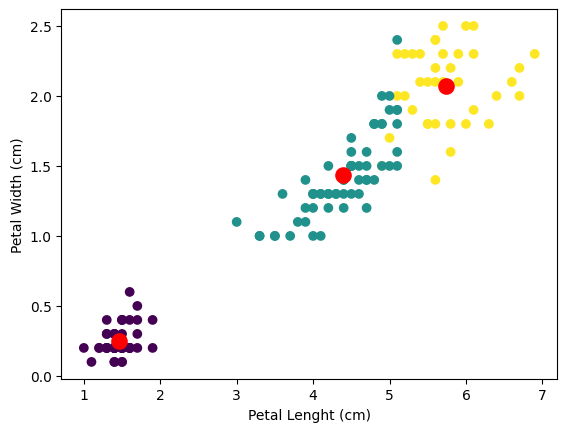

In [18]:
plt.scatter(Data_iris[:,2], Data_iris[:,3], c=Labels)
plt.scatter(Ctn[:,2], Ctn[:,3], marker='o', color='red', s=120)
plt.xlabel('Petal Lenght (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

#### Evaluating the model with its INERTIA vs K-value

In [19]:
KMNS.inertia_

78.85144142614601

The idea is to compare this Inertia values with other numbers, in order to know if it is good or not

In [20]:
K_inertia = []
for i in range(1,10):
    KMNS = KMeans(n_clusters=i, random_state=44) #random_state -> to not change the sorting every time it runs
    KMNS.fit(Data_iris)
    K_inertia.append(KMNS.inertia_)
    

In [21]:
K_inertia

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.25552380952381,
 46.44618205128205,
 39.03998724608725,
 34.420191786283894,
 30.598185064935066,
 28.298658730158735]

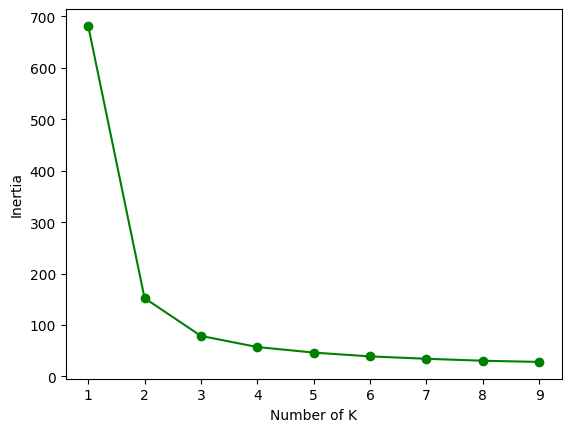

In [22]:
plt.plot(range(1,10), K_inertia, color='green', marker='o')
plt.xlabel('Number of K')
plt.ylabel('Inertia')
plt.show()

The Elbow Method shows that the optimal K-value is 3, because after this number the inertia value does not decreased much. And it is True, cus we know that the dataset has 3 clusters. 

- If the k-values is not specified, then choosing a randowm k-value and draw the graph of inertia vs k-value and choose the right k-values.

### DBSCAN Clustering Method

In [23]:
from sklearn.cluster import DBSCAN

In [40]:
DBS = DBSCAN(eps= 0.7, min_samples=4)
DBS

DBSCAN(eps=0.7, min_samples=4)

In [41]:
DBS.fit(Data_iris)

DBSCAN(eps=0.7, min_samples=4)

In [42]:
Labels_DBS = DBS.labels_
Labels_DBS

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

The -1 values on the Labels list are the potential abnormalities or outliers detected

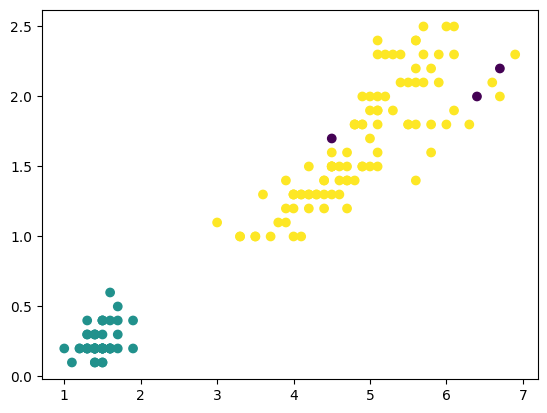

In [43]:
plt.scatter(Data_iris[:,2], Data_iris[:,3], c=Labels_DBS)
plt.show()

The purple points are the -1 values (potential abnormalities or outliers)

If the EPS is very small (thus, no other points can be on that circle anymore except the point itself), then every data point is spotted as potential abnormality.

- A very small EPS is not a good way to improve the DBSCAN model

If EPS is very large, there are no noise detected. The circle is very big that there is no change to have noise in the dataset.
- A very large EPS does not allow to find any noise in the dataset


### Hierarchical Clustering Method

In [44]:
# Use scipy lib
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [84]:
HR = linkage(Data_iris, method='complete') #method='complete'
HR

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+00, 3.80000000e+01, 1.41421356e-01, 2.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 1.41421356e

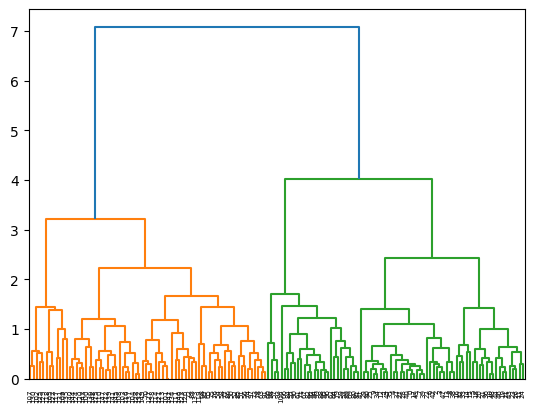

In [85]:
Dendo = dendrogram(HR)


In [87]:
# t -> is the maximum internal cluster distance allowed
# if t is too small -> it does not allow any 2 samples to form a cluster, so there are lots of clusters (each point is a cluster for itself)
# if t is to big -> it creates no clusters because there is just one cluster
# criterion -> in this case is the 'distance'
Labels_HR = fcluster(HR, 4, criterion='distance')
Labels_HR

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

#### Visualizing the labels

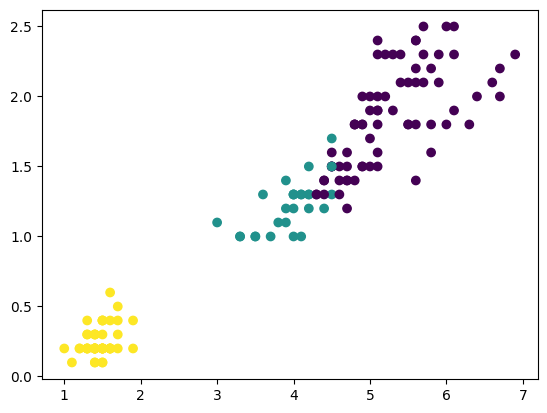

In [88]:
plt.scatter(Data_iris[:,2], Data_iris[:,3], c=Labels_HR)
plt.show()